In [6]:
import pandas as pd
import numpy as np

In [7]:
def mount_google_drive():
    """Mount Google Drive to persist model downloads across sessions"""
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        print("✓ Google Drive mounted successfully!")
        return True
    except:
        print("⚠ Not running in Colab or Drive already mounted")
        return False


In [8]:
mount_google_drive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Google Drive mounted successfully!


True

In [9]:
import zipfile
zip_path = "/content/drive/MyDrive/finaldata.csv.zip"
extract_dir = "/content"
target_file = "finaldata.csv"

with zipfile.ZipFile(zip_path, 'r') as z:
    if target_file in z.namelist():
        z.extract(target_file, extract_dir)
        print("Successfully extracted:", target_file)
        print("File available at:", extract_dir + "/" + target_file)
    else:
        print("CSV file not found inside ZIP. Files inside ZIP:")
        print(z.namelist())

Successfully extracted: finaldata.csv
File available at: /content/finaldata.csv


In [10]:
csv_path = "/content/finaldata.csv"
df = pd.read_csv(csv_path)
print("Loaded shape:", df.shape)
df.head()

/tmp/ipython-input-2451112345.py:2: DtypeWarning: Columns (76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Loaded shape: (203578, 79)


,person1_id,person2_id,total_messages,conversation_start,last_message,person1_is_mentor,person1_is_entrepreneur,person1_country,person1_gender,person1_ethnicity,...,person2_new_entrepreneurs_digest,person2_venture_stage,person2_venture_employee_count,person2_num_endorsements,person2_first_name,person2_last_name,full_conversation,translated_text,detected_language,was_translated
0,1635114,1880293,7,2025-06-09 23:02:06.999 +0530,2025-08-04 20:56:12.741 +0530,True,False,EG,m,NaN,...,True,profitable,NaN,0,Mohamed snosy,antr,Mohamed Ghanem (2025-06-09 23:02:06.999+05:30)...,Mohamed Ghanem (2025-06-09 18:32:06.999+01): H...,ar,True
1,310682,1899553,2,2025-06-20 19:11:54.805 +0530,2025-08-04 20:50:32.920 +0530,True,False,CL,f,NaN,...,True,operational,NaN,0,Geraldine,Pereira,Geraldine Pereira (2025-06-20 19:11:54.805+05:...,Geraldine Pereira (2025-06-20 14:41:54.805+01)...,es,True
2,310682,1860596,2,2025-04-15 06:51:03.830 +0530,2025-08-04 20:47:22.902 +0530,True,False,CL,f,NaN,...,True,operational,NaN,0,Yasmin,Sanchez,Yasmin Sanchez (2025-04-15 06:51:03.83+05:30):...,Yasmin Sanchez (2025-04-15 02:21:03.83+01): He...,es,True
3,310682,1360170,2,2025-06-02 20:30:39.580 +0530,2025-08-04 20:44:58.873 +0530,True,False,CL,f,NaN,...,True,earning,NaN,0,Sammy,Manrique,Sammy Manrique (2025-06-02 20:30:39.58+05:30):...,Sammy Manrique (2025-06-02 16:00:39.58+01): Hi...,es,True
4,310682,1889323,4,2025-06-07 04:03:24.605 +0530,2025-08-04 20:38:53.905 +0530,True,False,CL,f,NaN,...,False,earning,NaN,0,Blanca,Bastida,Blanca Bastida (2025-06-07 04:03:24.605+05:30)...,Blanca Bastida (2025-06-06 23:33:24.605+01): H...,es,True


In [12]:
df.shape

(203578, 79)

In [14]:
df.columns

Index(['person1_id', 'person2_id', 'total_messages', 'conversation_start',
       'last_message', 'person1_is_mentor', 'person1_is_entrepreneur',
       'person1_country', 'person1_gender', 'person1_ethnicity',
       'person1_company', 'person1_company_job',
       'person1_professional_background', 'person1_venture_description',
       'person1_venture_launch_date', 'person1_venture_type',
       'person1_birth_year', 'person1_help_given',
       'person1_highest_level_of_education', 'person1_preferred_language',
       'person1_management_experience', 'person1_ownership_experience',
       'person1_contact_avaibility', 'person1_venture_actions',
       'person1_venture_challenges', 'person1_venture_goals',
       'person1_motivation_mentorship', 'person1_timezone',
       'person1_before_we_start', 'person1_expectations',
       'person1_notify_on_new_messages', 'person1_new_mentors_digest',
       'person1_new_entrepreneurs_digest', 'person1_venture_stage',
       'person1_venture_

In [15]:
df_id = df[
    (df['person1_country'] == 'ID') |
    (df['person2_country'] == 'ID')
] # we have choosem row where both person 1 and 2 are from INDONESIA

In [16]:
df_id.shape

(17690, 79)

In [17]:
valid_mask = (
    (df_id['person1_is_mentor'] + df_id['person2_is_mentor'] == 1) &
    (df_id['person1_is_entrepreneur'] + df_id['person2_is_entrepreneur'] == 1)
)
# checking that for each row we must have both enterprenuer and mentor as then only we would be able to do matching

df_valid = df_id[valid_mask].copy()

In [18]:
df_valid.shape

(16855, 79)

In [27]:
df_valid[['person1_is_mentor', 'person2_is_mentor']].sum(axis=1).value_counts()
df_valid[['person1_is_entrepreneur', 'person2_is_entrepreneur']].sum(axis=1).value_counts()

,count
1,9829


In [28]:
valid_mask = (
    (df_id[['person1_is_mentor', 'person2_is_mentor']].sum(axis=1) == 1) &
    (df_id[['person1_is_entrepreneur', 'person2_is_entrepreneur']].sum(axis=1) == 1)
)

df_valid = df_id[valid_mask].copy()

In [29]:
df_valid.shape

(9829, 79)

In [30]:
df_valid[['person1_is_mentor', 'person2_is_mentor']].sum(axis=1).value_counts()
df_valid[['person1_is_entrepreneur', 'person2_is_entrepreneur']].sum(axis=1).value_counts()

,count
1,9829


In [36]:
txt = df["full_conversation"].iloc[0]
txt

'Ir. JOKO BIRATNO SUSANTO (2023-02-16 05:15:28.703+05:30): selamat pagi kak Bobby,  saya usaha di bidang kuliner emping goreng dan kacang goreng, masih kecil karena belum ada ijin, sekarang lagi ngurus ijin, saya ingin mengembangkan usaha saya agar bisa naik kasta dari angkringan ke super market atau out let mana lagi yang prospek? saya minta masukan kak Bobby tentang pemasaran dan semua mengenai usaha saya agar bisa lebih maju. Terima kasih | Gabriel Sanjaya (2023-02-16 05:39:05.711745+05:30): Salam sehat kak Joko, \r\n\r\nNaik bajaj beralih ke busway tentu menjadi salah saru pertimbangan tertentu untuk beralih moda transportasi. Juga halnya dengan mengubah angkringan menjadi supermarket.\r\n\r\nAda beberapa aspek yang perlu ditinjau lagi adalah mulai dari permodalan, penentuan lokasi, target pasar untuk menjawab kebutuhan pasar.\r\n\r\nDan satuhal yang lebih penting lagi aspek legalitas usaha. Mengapa?\r\n\r\nLegalitas usaha merupakan jati diri yang menegaskan sebuah usaha agar menda

In [38]:
def get_mentor_name(row):
    if row['person1_is_mentor']:
        return f"{row['person1_first_name']} {row['person1_last_name']}"
    else:
        return f"{row['person2_first_name']} {row['person2_last_name']}"

df_valid['mentor_name'] = (
    df_valid.apply(get_mentor_name, axis=1)
    .str.lower()
    .str.strip()
)

In [42]:
import re
def mentor_replied(conversation, mentor_name):
    if pd.isna(conversation) or mentor_name == '':
        return 0
    pattern = re.escape(mentor_name) + r"\s*\("
    return int(bool(re.search(pattern, conversation.lower())))

df_valid['mentor_replied'] = df_valid.apply(
    lambda r: mentor_replied(r['full_conversation'], r['mentor_name']),
    axis=1
)

In [43]:
df_valid['matching_happened'] = df_valid['mentor_replied']

In [44]:
df_valid['matching_happened'].value_counts()

,count
matching_happened,
1,9634
0,195


In [45]:
df_valid.shape

(9829, 82)

In [46]:
df_valid.describe()

,person1_id,person2_id,total_messages,person1_birth_year,person1_management_experience,person1_ownership_experience,person1_venture_employee_count,person1_num_endorsements,person2_birth_year,person2_management_experience,person2_ownership_experience,person2_venture_employee_count,person2_num_endorsements,mentor_replied,matching_happened
count,9.829000e+03,9.829000e+03,9829.000000,9383.000000,8602.000000,8601.000000,189.000000,9829.000000,9476.000000,1365.000000,1365.000000,167.000000,9829.000000,9829.000000,9829.000000
mean,1.211880e+06,1.330605e+06,6.155153,1990.507407,12.913160,10.842809,4.650794,0.031743,1991.056036,14.249084,10.459341,2.215569,0.010174,0.980161,0.980161
std,3.901438e+05,3.408542e+05,10.779935,11.871654,111.525167,112.232730,3.079576,0.298568,10.800944,121.360927,108.696391,2.117397,0.150627,0.139455,0.139455
min,1.060600e+04,4.974200e+04,2.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.114298e+06,1.249529e+06,2.000000,1982.000000,2.000000,1.000000,2.000000,0.000000,1983.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,1.385896e+06,1.460385e+06,3.000000,1993.000000,4.000000,2.000000,4.000000,0.000000,1994.000000,4.000000,3.000000,2.000000,0.000000,1.000000,1.000000
75%,1.463295e+06,1.533123e+06,7.000000,2001.000000,10.000000,7.000000,5.000000,0.000000,2000.000000,10.000000,6.000000,3.000000,0.000000,1.000000,1.000000
max,1.870618e+06,1.895047e+06,233.000000,2005.000000,2007.000000,2018.000000,10.000000,11.000000,2007.000000,2022.000000,2017.000000,15.000000,4.000000,1.000000,1.000000


In [48]:
def pick(row, role, field):
    if row[f'person1_is_{role}']:
        return row[f'person1_{field}']
    else:
        return row[f'person2_{field}']

# ----- Mentor columns -----
df_valid['mentor_preferred_language'] = df_valid.apply(
    lambda r: pick(r, 'mentor', 'preferred_language'), axis=1
)

df_valid['mentor_industry'] = df_valid.apply(
    lambda r: pick(r, 'mentor', 'mentor_industry'), axis=1
)

df_valid['mentor_management_experience'] = df_valid.apply(
    lambda r: pick(r, 'mentor', 'management_experience'), axis=1
)

df_valid['mentor_ownership_experience'] = df_valid.apply(
    lambda r: pick(r, 'mentor', 'ownership_experience'), axis=1
)

df_valid['mentor_num_endorsements'] = df_valid.apply(
    lambda r: pick(r, 'mentor', 'num_endorsements'), axis=1
)

# ----- Entrepreneur columns -----
df_valid['entrepreneur_preferred_language'] = df_valid.apply(
    lambda r: pick(r, 'entrepreneur', 'preferred_language'), axis=1
)

df_valid['entrepreneur_venture_industry'] = df_valid.apply(
    lambda r: pick(r, 'entrepreneur', 'venture_industry'), axis=1
)

df_valid['venture_stage'] = df_valid.apply(
    lambda r: pick(r, 'entrepreneur', 'venture_stage'), axis=1
)

df_valid['venture_employee_count'] = df_valid.apply(
    lambda r: pick(r, 'entrepreneur', 'venture_employee_count'), axis=1
)

In [58]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [59]:
X.isna().sum().sort_values(ascending=False)

,0
person2_ethnicity,9772
person1_ethnicity,9764
person2_venture_employee_count,9662
venture_employee_count,9658
person1_venture_employee_count,9640
detected_language,9507
person1_highest_level_of_education,9334
person2_highest_level_of_education,9195
person2_timezone,8951
person2_before_we_start,8800


In [60]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [61]:
final_features = [
    # Language
    'mentor_preferred_language',
    'entrepreneur_preferred_language',

    # Industry
    'mentor_industry',
    'entrepreneur_venture_industry',

    # Mentor experience
    'mentor_management_experience',
    'mentor_ownership_experience',
    'mentor_num_endorsements',

    # Venture maturity
    'venture_stage'
]

In [62]:
X = df_valid[final_features].copy()
y = df_valid['matching_happened']

In [63]:
categorical_cols = [
    'mentor_preferred_language',
    'entrepreneur_preferred_language',
    'mentor_industry',
    'entrepreneur_venture_industry',
    'venture_stage'
]

numeric_cols = [
    'mentor_management_experience',
    'mentor_ownership_experience',
    'mentor_num_endorsements'
]

In [64]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

In [65]:
model = LogisticRegression(
    penalty='l2',
    class_weight='balanced',
    max_iter=1000
)

In [66]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

In [67]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [68]:
baseline_auc = cross_val_score(
    pipeline,
    X,
    y,
    cv=cv,
    scoring='roc_auc'
).mean()

print("Baseline AUC:", baseline_auc)

Baseline AUC: 0.6639793077573464


In [69]:
baseline_auc = 0.6639793077573464

In [70]:
feature_groups = {
    'Language': [
        'mentor_preferred_language',
        'entrepreneur_preferred_language'
    ],
    'Industry': [
        'mentor_industry',
        'entrepreneur_venture_industry'
    ],
    'Mentor_Experience': [
        'mentor_management_experience',
        'mentor_ownership_experience',
        'mentor_num_endorsements'
    ],
    'Venture_Maturity': [
        'venture_stage'
    ]
}

In [71]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def evaluate_features(X, y, categorical_cols, numeric_cols):
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.impute import SimpleImputer
    from sklearn.linear_model import LogisticRegression

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0))
    ])

    preprocessor = ColumnTransformer([
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ])

    model = LogisticRegression(
        penalty='l2',
        class_weight='balanced',
        max_iter=1000
    )

    pipeline = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    return cross_val_score(
        pipeline, X, y, cv=cv, scoring='roc_auc'
    ).mean()

In [72]:
results = []

for group_name, group_features in feature_groups.items():
    X_ablated = X.drop(columns=group_features)

    categorical_cols_ablated = [
        c for c in categorical_cols if c in X_ablated.columns
    ]

    numeric_cols_ablated = [
        c for c in numeric_cols if c in X_ablated.columns
    ]

    auc = evaluate_features(
        X_ablated,
        y,
        categorical_cols_ablated,
        numeric_cols_ablated
    )

    results.append({
        'Feature_Group': group_name,
        'AUC': auc,
        'Delta_AUC': baseline_auc - auc
    })

In [73]:
ablation_df = pd.DataFrame(results).sort_values(
    by='Delta_AUC', ascending=False
)

ablation_df

,Feature_Group,AUC,Delta_AUC
2,Mentor_Experience,0.628764,0.035216
3,Venture_Maturity,0.640151,0.023828
1,Industry,0.646698,0.017282
0,Language,0.660086,0.003893


In [75]:
ablation_df = pd.DataFrame({
    'Feature Group': [
        'Mentor Experience',
        'Venture Maturity',
        'Industry Alignment',
        'Language Alignment'
    ],
    'Delta AUC': [
        0.035216,
        0.023828,
        0.017282,
        0.003893
    ]
}).sort_values('Delta AUC', ascending=True)

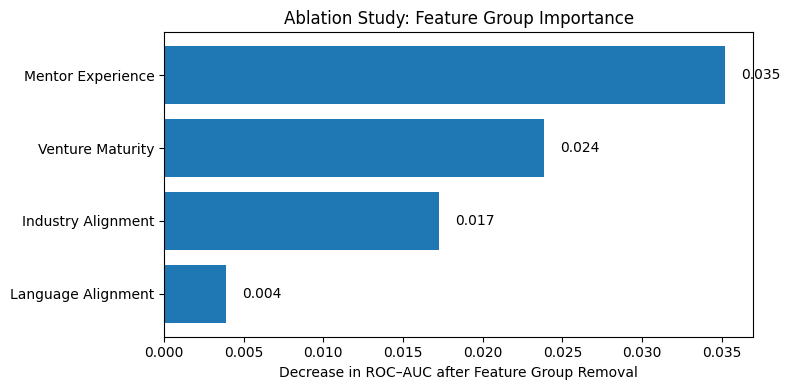

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.barh(
    ablation_df['Feature Group'],
    ablation_df['Delta AUC']
)

plt.xlabel('Decrease in ROC–AUC after Feature Group Removal')
plt.title('Ablation Study: Feature Group Importance')

# Annotate bars with exact ΔAUC values
for i, v in enumerate(ablation_df['Delta AUC']):
    plt.text(v + 0.001, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.show()

In [77]:
plt.savefig(
    "ablation_feature_importance.png",
    dpi=300,
    bbox_inches='tight'
)

<Figure size 640x480 with 0 Axes>